In [ ]:
import pandas as pd

In [ ]:
!ls

'Online Retail.xlsx'   sample_data


In [ ]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df = df[~df['CustomerID'].isnull()]
df.shape

(406829, 8)

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


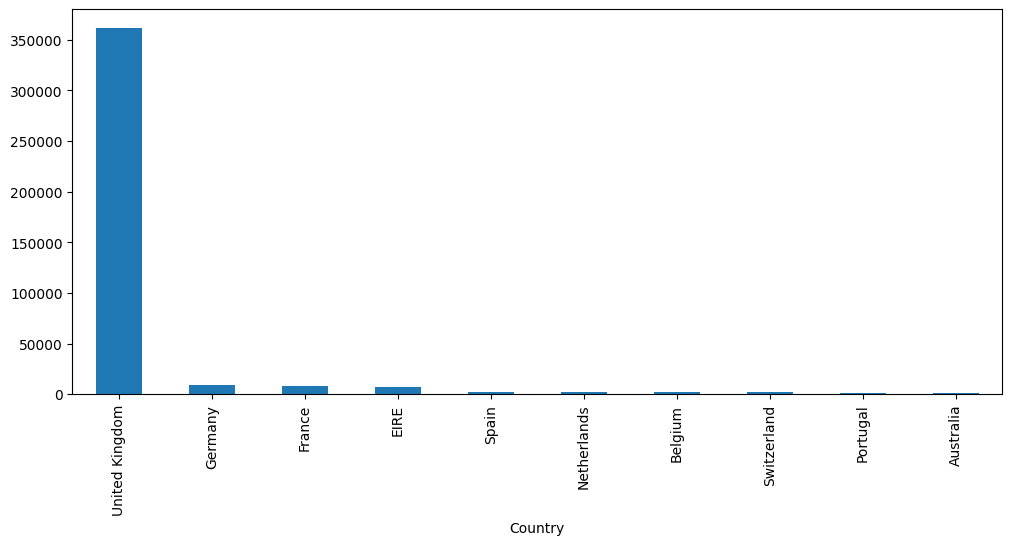

In [ ]:
df.Country.value_counts()[:10].plot(kind='bar', figsize=(12, 5));

In [ ]:
df = df[df.Country == 'United Kingdom']

In [ ]:
df.shape

(361878, 8)

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,361878.000000,361878,361878.000000,361878.000000
mean,11.077029,2011-07-10 23:48:12.301493760,3.256007,15547.871368
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 17:25:00,1.250000,14194.000000
50%,4.000000,2011-07-31 13:07:00,1.950000,15514.000000
75%,12.000000,2011-10-23 11:39:00,3.750000,16931.000000
max,80995.000000,2011-12-09 12:49:00,38970.000000,18287.000000
std,263.129266,NaN,70.654731,1594.402590


In [ ]:
df_neg = df[df.Quantity < 0] # кажется это возвраты и их надо удалить

In [ ]:
df[df.Quantity == -80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [ ]:
df[(df.StockCode == 23843) & (df.CustomerID == 16446)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [ ]:
df_pos = df[df.Quantity > 0] # кажется это возвраты и их надо удалить

In [ ]:
df_pos.shape

(354345, 9)

In [ ]:
list(zip([1,2,3], [4,5,6]))

[(1, 4), (2, 5), (3, 6)]

In [ ]:
bad_deals = set(zip(df_neg['StockCode'], df_neg['CustomerID']))
df_pos['id'] = list(zip(df_pos['StockCode'], df_pos['CustomerID']))
df_pos = df_pos[~df_pos['id'].isin(bad_deals)]

<ipython-input-43-374872b0f604>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['id'] = list(zip(df_pos['StockCode'], df_pos['CustomerID']))


In [ ]:
df_pos.shape

(339591, 9)

In [ ]:
df_pos.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,"(85123A, 17850.0)"
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,"(71053, 17850.0)"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,"(84406B, 17850.0)"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,"(84029G, 17850.0)"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,"(84029E, 17850.0)"


In [ ]:
df.InvoiceDate.max(), df.InvoiceDate.min()

(Timestamp('2011-12-09 12:49:00'), Timestamp('2010-12-01 08:26:00'))

In [ ]:
import datetime as dt
current_date = dt.datetime(2011, 12, 10)

df_pos['InvoiceDate'] = pd.to_datetime(df.InvoiceDate)

df_pos.loc[:,'TotalMoney'] = df_pos['Quantity'] * df_pos['UnitPrice']
df_pos['Recently'] = df_pos['InvoiceDate'].apply(lambda w: (current_date - w).days)

<ipython-input-66-020fbd8df725>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['InvoiceDate'] = pd.to_datetime(df.InvoiceDate)
<ipython-input-66-020fbd8df725>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['Recently'] = df_pos['InvoiceDate'].apply(lambda w: (current_date - w).days)


In [ ]:
df_agg = (
    df_pos.groupby('CustomerID')
    .agg({
        'Recently': 'min',
        'TotalMoney': 'mean',
        'InvoiceNo': 'count'
    })
)
df_agg.columns = ['recently', 'money', 'frequency']
df_agg.head()

,recently,money,frequency
CustomerID,,,
12747.0,2,40.737961,103
12748.0,0,6.603001,4462
12749.0,3,18.695577,156
12820.0,3,15.971864,59
12821.0,214,15.453333,6


In [ ]:
df_agg['recently_q'] = pd.qcut(df_agg['recently'], 4, ['1', '2', '3', '4'])
df_agg['money_q'] = pd.qcut(df_agg['money'], 4, ['1', '2', '3', '4'])
df_agg['frequency_q'] = pd.qcut(df_agg['frequency'], 4, ['1', '2', '3', '4'])

df_agg['cluster'] = df_agg['recently_q'].astype(str) + ' ' + df_agg['money_q'].astype(str) + ' ' + df_agg['frequency_q'].astype(str)

In [ ]:
df_agg.head()

,recently,money,frequency,recently_q,money_q,frequency_q,cluster
CustomerID,,,,,,,
12747.0,2,40.737961,103,1,4,4,1 4 4
12748.0,0,6.603001,4462,1,1,4,1 1 4
12749.0,3,18.695577,156,1,3,4,1 3 4
12820.0,3,15.971864,59,1,2,3,1 2 3
12821.0,214,15.453333,6,4,2,1,4 2 1


In [ ]:
df_agg[df_agg['cluster'] == '4 4 4']

,recently,money,frequency,recently_q,money_q,frequency_q,cluster
CustomerID,,,,,,,
13093.0,275,48.687762,143,4,4,4,4 4 4
17504.0,206,24.051607,112,4,4,4,4 4 4


In [ ]:
cnt = df_agg.cluster.value_counts()
interesting_clusters = cnt[cnt > 100].index

In [ ]:
import plotly.express as px

In [ ]:
px.scatter_3d(
    df_agg[df_agg.cluster.isin(interesting_clusters)],
    x = 'recently',
    y = 'money',
    z = 'frequency',
    color='cluster'
)